# Object Tracking(객체 추적)

## 1. Object Tracking이란?
Object Tracking은 뜻 그대로 영상 속에서 객체를 프레임 단위로 지속적으로 추적 기술이다. Object Detection은 객체가 어디에 있는지 모든 프레임마다 탐지하지만 Object Tracking은 객체가 어디로 이동하는지 처음 탐지 후 위치만 계속 추적한다!

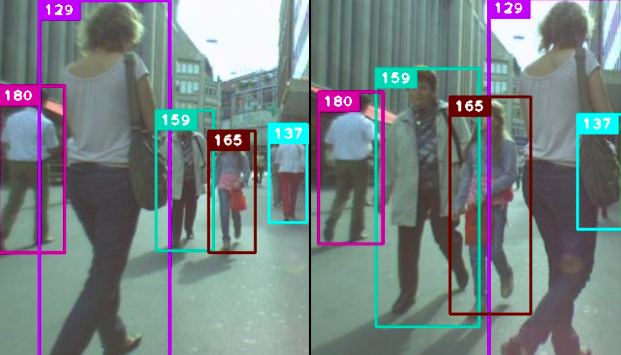

## 2. Object Tracking 유형
### Video tracking
영상 속에서 움직이는 물체의 위치를 추적하는 기술

### Visual tracking
영상 속에서 특정 대상을 지정해두면 스스로 위치를 예측하는 기술

### Image tracking
영상 속에서 특정 이미지를 찾고 따라가는 기술 <br>
ex) QR, 도형, 로고 등

## 3. Object Tracking의 어려움
### Training and tracking speed
Object Tracking 알고리즘은 정확도 뿐만 아니라 추적 속도가 필수적이다. <Br>
Fast R-CNN, Faster R-CNN을 사용하면 object tracking model을 생성할 때 사용되는 알고리즘인 R-CNN 방식의 속도와 정확도를 향상 시킬 수 있다. 

### Background distractions
추적해야 할 객체가 많으면 작은 객체를 감지하기 어렵다. <br>
blurry, single-color background을 사용하면 tracking하기 더 쉽다. 

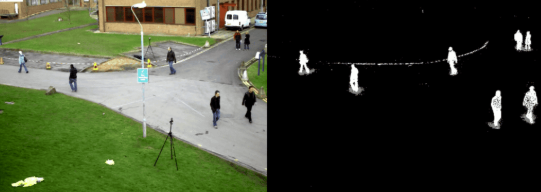

### Multiple spatial scales(공간적 규모)
추적 객체는 다양한 크기와 비율을 가진다 -> 알고리즘을 혼란스럽게 함
Multiple spatial scales 문제를 해결하기 위해 아래와 같은 기술을 구현할 수 있다:
- **Anchor boxes**: 고정된 크기/비율을 가진 경계 박스들의 집합으로, 다양한 객체 크기와 모양을 감지하기 위해 사용된다. <br>
                      ex) 강아지, 사람, 자동차처럼 크기/모양이 다른 걸 찾기 위한 기준 템플릿
- **Feature maps**: CNN이 이미지에 필터를 적용한 중간 결과물로 객체 위치/모양에 대한 정보가 담겨있다
- **Image and feature pyramid representations**: 다중 레벨 feature map. 객체 크기 변화에 대한 예비적인 해결책이다.
  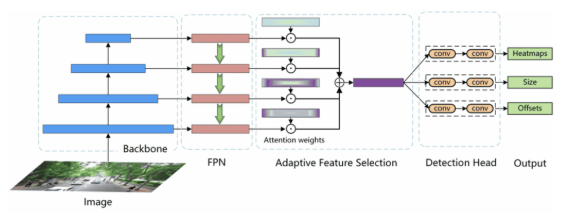

### Occlusion(폐색)
여러 객체가 병합되어 겹쳐서 발생한다. 이로 인해 가려진 객체가 잘못 추적되거나 단일 객체로 잘못 식별되어 tracking에 문제가 발생할 수 있다. <br>
**Occlusion sensitivity**는 tracking하는데 가장 중요한 것을 이해하도록 하여 오인식을 방지한다. 

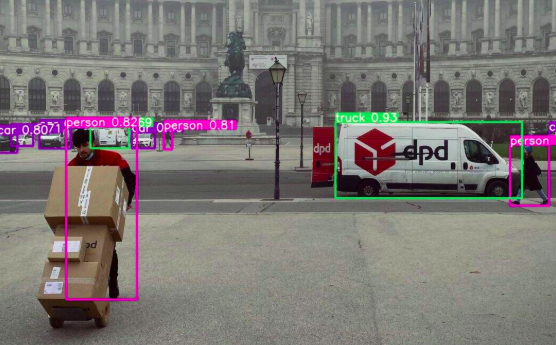 

## 4. Object tracking Algorithms
### Multiple Object Tracking(MOT)
영상 속 여러 객체를 자동으로 식별하고 각각의 이동 경로를 정확하게 추적하는 기술이다. 여러 개의 객체를 동시에 추적하며 여러 개의 클래스도 동시 추적이 가능하다. 
MOT는 대부분 Tracking-by-Detection방식을 사용한다. 객체를 먼저 detection하고 이 결과들을 연결해서 track하는 방식이다. 각 프레임에서 detection을 한 후 같은 객체인지 판단해 ID를 부여해 trajectory를 완성한다. 
- Batch 방식: 미래 프레임까지 참고해서 추적
- Online 방식: 과거/현재 프레임만 참고
- MOT 알고리즘 단계
  1. Detection: 영상에서 객체를 탐지하고 bounding box 표시
    2. Motion: 객체의 외형 정보와 이동 특성 추출, 객체의 다음 움직임 예측
    3. Recall: 이전 프레임의 detection 결과와 similarity 비교 후 같은 객체는 같은 ID로 연결, 새로운 객체는 새로운 ID 부여

### Multiple Object Tracking(MOT) vs General Object Detection
Object Detection은 여러 개의 바운딩 박스만을 출력하지만 Object Tracking은 바운딩 박스 + 각 객체에 ID를 부여하여 출력한다. 

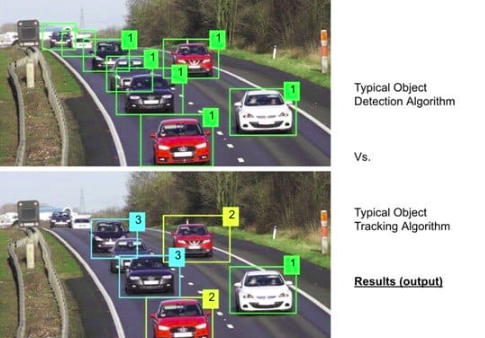

### Single Object Tracking
첫 프레임에서 추적할 하나의 객체를 지정하고 이후 프레임에서도 지정한 객체만 계속 추적한다. 새로운 객체가 등장해도 추적하지 않는다. 

#### 즉, **MOT**는 여러 객체를 추적하며 고유 ID를 부여하고, **SOT**는 하나의 객체만 지정해서 끝까지 추적한다!

참고: https://viso.ai/deep-learning/object-tracking/